# **Portfolio 1 - Deep learning**

    Groepsnummer: 2
    Coach: Vikram 
    Opdrachtnummer: 1
    Namen groepsleden: 
        - Isa Dijkstra, 22119485
        - Natasja , 22059326
        - Vince Ammerlaan, 21049599
    Kaggle naam:
    
    
## ***Inhoudsopgave*** <a name='begin'></a>

1. [Data inladen](#data)
2. [Opdracht 1 -EDA](#eda)
3. [Opdracht 2 - Fully connected neuraal netwerk](#CNN)
4. [Opdracht 3 - Convolutioneel neuraal netwerk from scratch](#CNNs)
5. [Opdracht 4 - Transfer learning](#tl)
6. [Opdracht 5 - Multimodaal model](#mm)
7. [Opdracht 6 - Bevindingen](#bevindingen)
8. [Opdracht 7 - Conclusie en aanbevelingen](#conclusie)
9. [Bronnenlijst](#bronnenlijst)

In [20]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import plot_model
from keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization

## Data inladen <a name='data'></a>

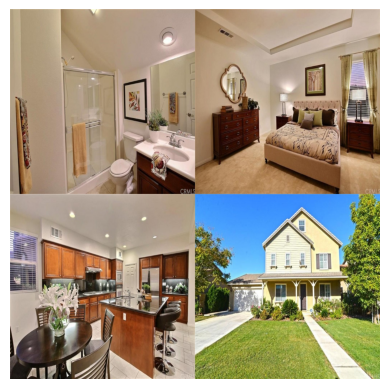

In [2]:
def load_random_image(path):
    files = os.listdir(path)
    image_files = [f for f in files if f.endswith('.png') or f.endswith('.jpg')]
    random_image_file = random.choice(image_files)
    image_path = os.path.join(path, random_image_file)
    image = mpimg.imread(image_path)
    return image

inputPath = 'Train'

image = load_random_image(inputPath)

plt.imshow(image)
plt.axis('off') 
plt.show()

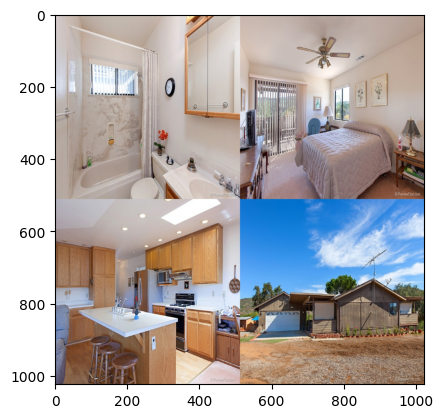

In [3]:
def load_random_image(path):
    files = os.listdir(path)
    image_files = [f for f in files if f.endswith('.png') or f.endswith('.jpg')]
    random_image_file = random.choice(image_files)
    image_path = os.path.join(path, random_image_file)
    image = Image.open(image_path)
    return image

image = load_random_image(inputPath)

plt.imshow(image)
plt.show()

In [ ]:
def load_images_and_create_dataframe(directory):
    # Initialize lists to store image data and filenames
    images = []
    filenames = []

    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is an image file
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            # Construct the full path to the image file
            filepath = os.path.join(directory, filename)
            
            # Load the image using PIL
            image = Image.open(filepath)
            
            # Convert the image to a NumPy array
            image_array = np.array(image)
            
            # Append the image data and filename to the lists
            images.append(image_array)
            filenames.append(filename)

    # Create a DataFrame with filenames and image data
    df = pd.DataFrame({'Filename': filenames, 'Image': images})
    
    df['Filename'] = df['Filename'].str.replace('.jpg', '')
    
    return df

# Example usage
inputPath = 'Train'
image_df = load_images_and_create_dataframe(inputPath)

In [4]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [ ]:
train['House ID'] = train['House ID'].astype(str)

merged_df = pd.merge(train, image_df, left_on='House ID', right_on='Filename')

# Drop the redundant 'Filename' column if needed
merged_df.drop('Filename', axis=1, inplace=True)

# Convert each element in the 'Image' column to a NumPy array
merged_df['Image2'] = merged_df['Image'].apply(np.array)

# Convert the dtype of each NumPy array in the 'Image' column to float32 and normalize
merged_df['Image2'] = merged_df['Image2'].apply(lambda x: x.astype('float32') / 255.0)

merged_df

[Terug naar Inhoudsopgave](#begin)

## Opdracht 1 - EDA <a name='eda'></a>

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
0,1,4,4.0,4053,33.6968,-111.8892,869500
1,2,4,3.0,3343,34.8280,-119.0349,865200
2,3,3,4.0,3923,33.7669,-111.9182,889000
3,4,5,5.0,4022,33.7752,-111.7791,910000
4,5,3,4.0,4116,33.7669,-111.9182,971226


,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,5.000000e+02
mean,250.500000,3.350000,2.669500,2369.64600,35.128844,-116.469049,5.980218e+05
std,144.481833,1.172283,1.017578,1208.18261,2.386173,6.554434,5.240649e+05
min,1.000000,1.000000,1.000000,701.00000,32.631500,-122.368300,2.200000e+04
25%,125.750000,2.000000,2.000000,1440.00000,33.808200,-119.802500,2.350000e+05
50%,250.500000,3.000000,2.500000,2097.50000,33.920800,-117.609600,5.300000e+05
75%,375.250000,4.000000,3.000000,3104.50000,35.640600,-116.371300,7.490000e+05
max,500.000000,10.000000,7.000000,9583.00000,47.791800,-87.885900,5.858000e+06


House ID     0
Bedrooms     0
Bathrooms    0
Area         0
Latitude     0
Longitude    0
Price        0
dtype: int64

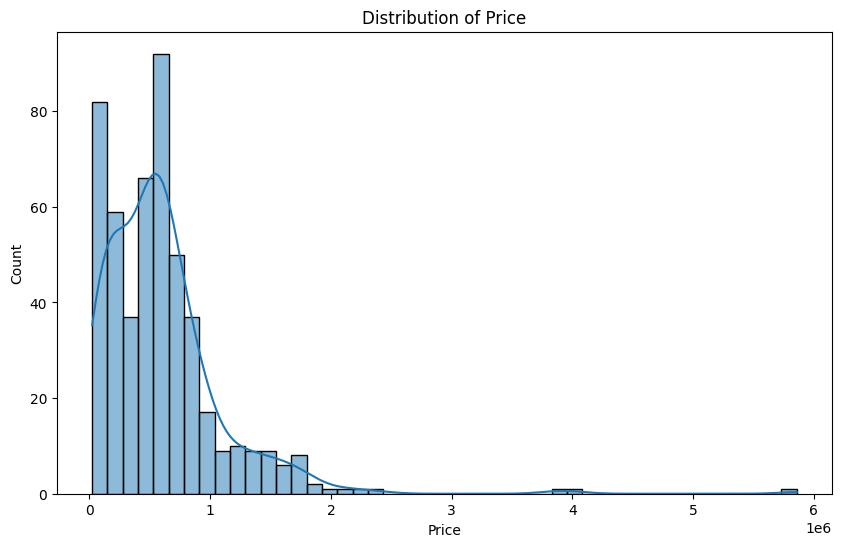

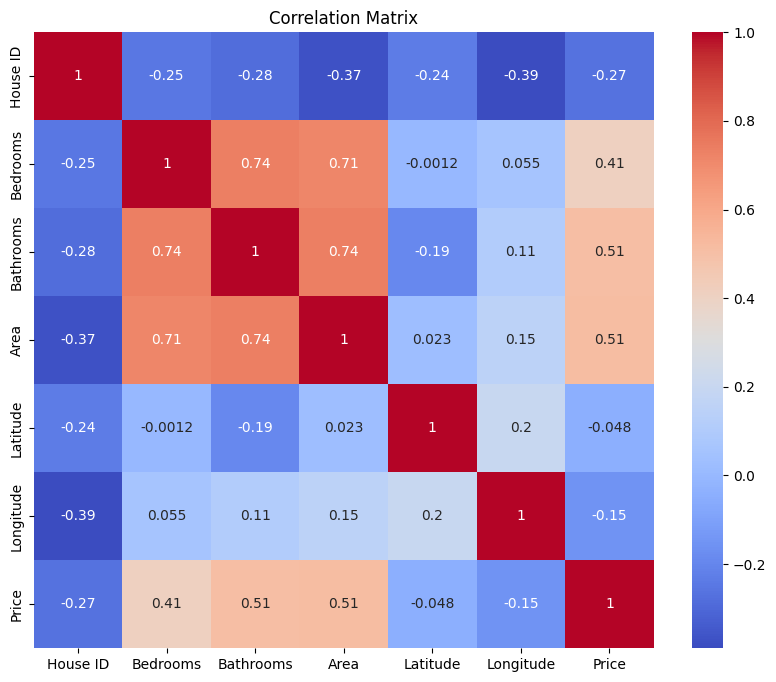

In [5]:
display(train.head())
display(train.describe())

#Missende waardes
display(train.isnull().sum())

# Distribution of the target variable 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(train['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

# Correlation matrix
corr = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

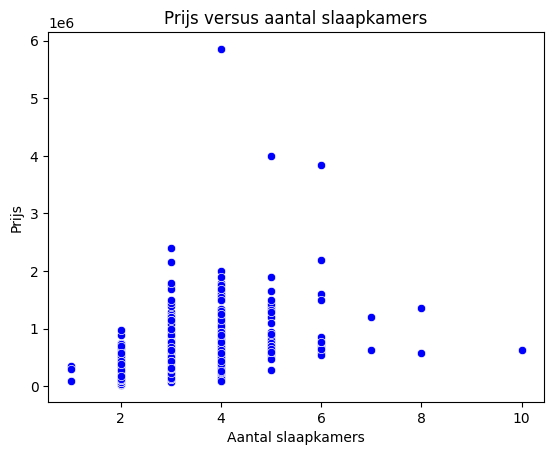

In [6]:
sns.scatterplot(data=train, x='Bedrooms', y='Price', color='blue')
plt.xlabel('Aantal slaapkamers')
plt.ylabel('Prijs')
plt.title('Prijs versus aantal slaapkamers')
plt.show()

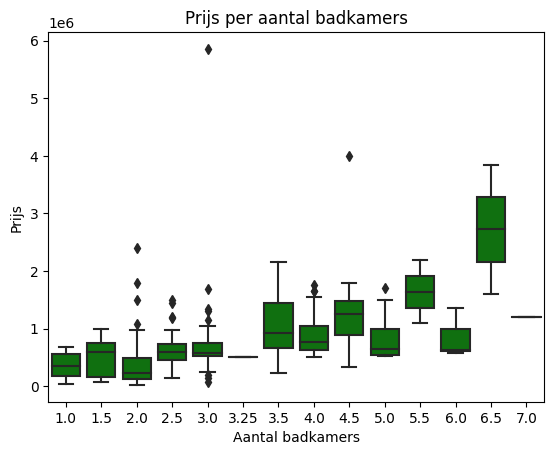

In [7]:
# Boxplot van prijs per aantal badkamers
sns.boxplot(data=train, x='Bathrooms', y='Price', color='green')
plt.xlabel('Aantal badkamers')
plt.ylabel('Prijs')
plt.title('Prijs per aantal badkamers')
plt.show()

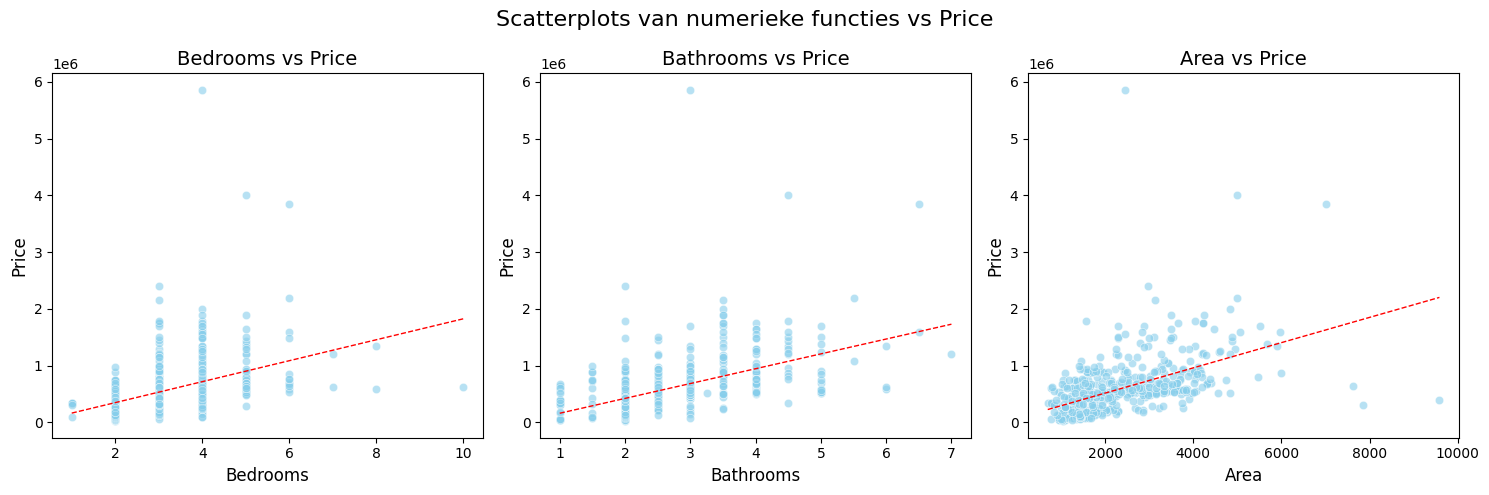

In [8]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).iloc[:, 1:-3]
num_plots = len(numeric_features.columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

plt.figure(figsize=(15, 5*num_rows))

for i, col in enumerate(numeric_features.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.scatterplot(x=col, y='Price', data=train, color='skyblue', alpha=0.6)
    sns.regplot(x=col, y='Price', data=train, scatter=False, color='red', ci=None, line_kws={'linewidth':1, 'linestyle':'--'})
    plt.title(f"{col} vs Price", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Price", fontsize=12)

plt.suptitle("Scatterplots van numerieke functies vs Price", fontsize=16)
plt.tight_layout()
plt.show()

[Terug naar Inhoudsopgave](#begin)

## Opdracht 2 - Fully connected neuraal netwerk <a name='CNN'></a>

### **Neuraal Netwerk**

In [10]:
    features = train.drop('Price', axis=1)
    target = train['Price']

    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)
    num_features = features.shape[1]

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,)))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(1))

    model.compile(optimizer='adam', loss='mape')
    history = model.fit(features_train, target_train, epochs=40, batch_size=32, validation_data=(features_test, target_test))
    predictions = model.predict(features_test)

    mape = mean_absolute_percentage_error(target_test, predictions)
    print("Mean Absolute Pecrentage Error:", mape)

Epoch 1/40
13/13 [==============================] - 0s 4ms/step - loss: 99.9755 - val_loss: 99.8771
Epoch 2/40
13/13 [==============================] - 0s 1ms/step - loss: 99.8279 - val_loss: 99.7355
Epoch 3/40
13/13 [==============================] - 0s 1ms/step - loss: 99.7010 - val_loss: 99.5919
Epoch 4/40
13/13 [==============================] - 0s 1ms/step - loss: 99.5582 - val_loss: 99.4113
Epoch 5/40
13/13 [==============================] - 0s 1ms/step - loss: 99.3706 - val_loss: 99.1813
Epoch 6/40
13/13 [==============================] - 0s 1ms/step - loss: 99.1296 - val_loss: 98.8751
Epoch 7/40
13/13 [==============================] - 0s 1ms/step - loss: 98.8185 - val_loss: 98.4796
Epoch 8/40
13/13 [==============================] - 0s 1ms/step - loss: 98.4225 - val_loss: 97.9944
Epoch 9/40
13/13 [==============================] - 0s 1ms/step - loss: 97.9238 - val_loss: 97.3817
Epoch 10/40
13/13 [==============================] - 0s 1ms/step - loss: 97.3154 - val_loss: 96.6148

### **Visualiseren**

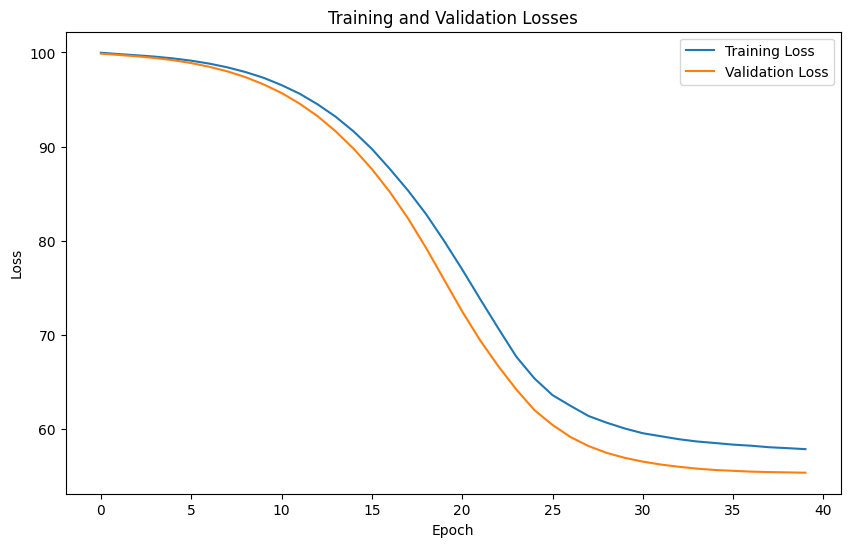

In [11]:
# PLot van training en validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Modelarchitectuur**

Werkt niet helaas

In [ ]:
from tensorflow.keras.utils import plot_model

tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### **Keuze's onderbouwen**
- Aantal lagen en neuronen per laag:
We hebben twee hidden layers, waar ons neurale netwerk leert over de kenmerken van huizen die de prijzen beïnvloeden. Het aantal neuronen in elke laag is zo gekozen dat het netwerk complexe patronen kan begrijpen zonder te ingewikkeld te worden.

- Activeringsfuncties:
We gebruiken een soort 'activatie' genaamd ReLU in onze netwerk. Dit helpt ons netwerk om de gegevens te begrijpen en te leren zonder vast te lopen.

- Optimizer:
De "optimizer" helpt ons netwerk om te leren van de gegevens. We gebruiken een populaire keuze genaamd Adam, die zich aanpast aan de gegevens terwijl het leert.

-  Aantal Epochs
Door te kijken hoe de trainings- en validatieloss veranderen tijdens de trainingsperiode, kunnen we een goed moment vinden om te stoppen met trainen, om overfitting te vermijden. Zoals je in de visualisatie kan zien zie je de trainingsloss snel afnemen en de validatieloss vlak worden na ongeveer 40 epochs, daarom is 40 epochs een goed moment om te stoppen met trainen.

### **Welke lossfunctie**

Voor het voorspellen van huizenprijzen is de Mean Absolute Percentage Error (MAPE) een goede lossfunctie. Deze lossfunctie meet het gemiddelde percentage waarmee de voorspellingen afwijken van de werkelijke waarden. Het is een handige metric voor regressieproblemen zoals huizenprijsvoorspellingen omdat het de nauwkeurigheid van de voorspellingen weergeeft en daarbij ook kijkt naar hoe groot het verschil is ten opzichte van de huizenprijzen.

Adam is een slim algoritme dat helpt bij het trainen van neurale netwerken, zoals ons model om huizenprijzen te voorspellen. Het werkt als volgt:

- Adaptieve leersnelheid: Adam past de leersnelheid (hoe snel het model leert van de gegevens) aan voor elk gewicht in het netwerk. Als sommige kenmerken van de gegevens moeilijker zijn om te leren, zal Adam automatisch de leersnelheid voor die kenmerken verlagen, zodat het model ze beter kan begrijpen.

- Momentum: Het houdt ook rekening met de richting van de vorige updates tijdens het trainen. Als het model eenmaal in een bepaalde richting is gegaan om de lossfunctie te verbeteren, zal Adam die richting onthouden en sneller vooruit gaan in die richting. Dit helpt om sneller te convergeren naar een goed punt waar de voorspellingen nauwkeurig zijn.

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mape')
model.fit(features_train, target_train, epochs=40, batch_size=32, validation_data=(features_test, target_test))
predictions = model.predict(features_test)

mape = mean_absolute_percentage_error(target_test, predictions)
print("Mean Absolute Percentage Error:", mape)

Epoch 1/40
13/13 [==============================] - 0s 4ms/step - loss: 100.0172 - val_loss: 99.9153
Epoch 2/40
13/13 [==============================] - 0s 1ms/step - loss: 99.8552 - val_loss: 99.7558
Epoch 3/40
13/13 [==============================] - 0s 1ms/step - loss: 99.7124 - val_loss: 99.5968
Epoch 4/40
13/13 [==============================] - 0s 1ms/step - loss: 99.5491 - val_loss: 99.3905
Epoch 5/40
13/13 [==============================] - 0s 1ms/step - loss: 99.3276 - val_loss: 99.1064
Epoch 6/40
13/13 [==============================] - 0s 1ms/step - loss: 99.0399 - val_loss: 98.7338
Epoch 7/40
13/13 [==============================] - 0s 1ms/step - loss: 98.6560 - val_loss: 98.2651
Epoch 8/40
13/13 [==============================] - 0s 1ms/step - loss: 98.1805 - val_loss: 97.6656
Epoch 9/40
13/13 [==============================] - 0s 1ms/step - loss: 97.5803 - val_loss: 96.9212
Epoch 10/40
13/13 [==============================] - 0s 1ms/step - loss: 96.8175 - val_loss: 96.012

[Terug naar Inhoudsopgave](#begin)

## Opdracht 3 - Convolutioneel neuraal netwerk from scratch <a name='CNNs'></a>

### **Onderbouwing keuzes**
Onderbouw je keuzes van het aantal convolutionele lagen, poollagen, convolutionele kernels per laag, het aantal fully-connected lagen en het aantal neuronen per laag.


Een CNN kenmerkt zich door het gebruik van een kernel dat over een afbeelding beweegt, waarbij kenmerken kunnen worden gedetecteerd. In de simpelere lagen worden dingen als lijnen erkend en in de hogere lagen worden steeds abstractere details herkend. Een CNN moet worden afgestemd op hetgeen waarop het wordt toegepast. In het geval van onze portfolio-opdracht wordt de CNN toegepast op gedetailleerde en gevarieerde foto's om de huizenprijzen te kunnen voorspellen. Er is dus nodig dat er meer details worden herkend. Veel lagen en neuronen kunnen daarbij te pas komen, al moet een balans worden behouden ten op zichte van het aantal foto's. Als er bijvoorbeeld maar 3 foto's zouden zijn en je een model zou maken met 3 lagen die elk 3 neuronen bevatten, dan zou het kunnen dat de kans op overfitten erg groot wordt.
Als je tegelijkertijd een model wil creëeren waarbij je de kans op overfitten verlaagt, kun je kiezen voor meer pooling-lagen. Deze pooling-lagen maken de afbeeldingen minder complex, waarbij dus meer algemeenheden kunnen worden opgemerkt. Je versimpelt hiermee de input van het model en maakt het waarschijnlijk ook iets sneller dan wanneer de input uit nog steeds hele complexe plaatjes bestaat. 
We hebben per convolutional layer voor steeds meer  filters gekozen, zodat complexere details kunnen worden ontwaard.

3.	Gebruik een of meer van de volgende technieken in je model. Beschrijf en motiveer je keuze:

- L1 regularisatie
- L2 regularisatie
- Dropout
- Batchnorm

Doordat we een flink aantal lagen en neuronen gebruiken kan het trainen van het model wat vertraagd zijn. We gebruiken Batchnorm om weer wat snelheid in de training van het model te krijgen (https://en.wikipedia.org/wiki/Batch_normalization). Dropout is een techniek om overfitting te voorkomen. Door hier gebruik van te maken worden er willekeurig neuronen uitgezet. We gebruiken het ook weer dankzij ons flinke aantal lagen en neuronen. Ook L2 regularisatie kan overfitten voorkomen. Daarbij worden fouten kwadratisch vergroot, waardoor het gewicht extra wordt verkleind als een neuron een fout maakt.

NKOK
4.	Beschrijf welke vormen van data augmentation (indien van toepassing ) geschikt zijn voor dit probleem. Implementeer dit in je datapijplijn.
Data augmentation betekent het veranderen van de data met als doel de data diverser te maken en / of de hoeveelheid data te vergroten. Daarbij kun je denken aan de kleuren veranderen, de afbeelding spiegelen, vergroten, verkleinen, schuin maken en verschuiven. Omdat er naar kenmerken op foto's wordt gekeken en alle foto's redelijk recht lijken te zijn, lijken horizontaal spiegelen mij nuttig, evenals het feller maken of anderzijds veranderen van de helderheid van de foto's nuttig, omdat de lichtinval nogal kan verschillen per foto. 


NKOK: nog augmentation te doen hier

NKOK
5.	Compile je model met je gekozen lossfunctie en optimizer, en train deze op de afbeeldingen.
Ik kies voor Adam (https://www.analyticsvidhya.com/blog/2023/09/what-is-adam-optimizer/) als optimizer. De loss fuction die ik kies is de MSE, omdat die wordt aangeraden (https://builtin.com/machine-learning/common-loss-functions) bij CNNs. Ik kies voor relu als activation function, omdat die non-lineariteit introduceert. Dat zorgt ervoor dat een complexer model kan worden getraind.


In [ ]:
#NKOK nog niet af CNN met 3 lagen
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, img_channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1)) 

 ### **Bronnen**
https://www.analyticsvidhya.com/blog/2022/03/visualize-deep-learning-models-using-visualkeras/

[Terug naar Inhoudsopgave](#begin)

## Opdracht 4 - Transfer learning <a name='tl'></a>

In [ ]:
X = merged_df['Image']
y = merged_df['Price']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, so using sigmoid activation

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

In [ ]:
model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=10)
model.predict(X_test)
model.evaluate(X_test, y_test)

<b> Voordelen van het gebruik van vooraf getrainde visionmodellen </b>
    
Vooral getrainde visionmodellen hebben verschillende voordelen, zoals bijvoorbeeld:
- Je hebt minder gegevens nodig
- Het gebruikt minder rekenkracht
- Het is nauwkeuriger dan een op maat gebouwd CNN model.


https://appmaster.io/nl/glossary/computervisie

https://towardsdatascience.com/the-applications-and-benefits-of-a-pretrained-model-kaggles-dogsvscats-50221902c696




[Terug naar Inhoudsopgave](#begin)

## Opdracht 5 - Multimodaal model <a name='mm'></a>

[Terug naar Inhoudsopgave](#begin)

## Opdracht 6 - Bevindingen <a name='bevindingen'></a>

[Terug naar Inhoudsopgave](#begin)


## Opdracht 7 - Conclusie en aanbevelingen <a name='conclusie'></a>

[Terug naar Inhoudsopgave](#begin)

## Bronnenlijst <a name='bronnenlijst'></a>

[Terug naar Inhoudsopgave](#begin)